# LetsGrowMore

# Ashik Kumar


# Task - 4

# ML_Facial_recognition_to_detect_mood_and_suggest_songs_accordingly

In [54]:
#installing important libraries
!pip install deepface
!sudo pip install python-vlc
!pip install pafy
!pip install youtube_dl

'sudo' is not recognized as an internal or external command,
operable program or batch file.


In [55]:
#importing libraries
import cv2
from deepface import DeepFace
import matplotlib.pyplot as plt
import numpy as np

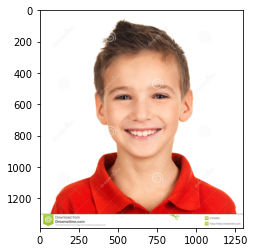

In [56]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
  
# Read Images
img = mpimg.imread('happy.jpg')
  
# Output Images
plt.imshow(img)

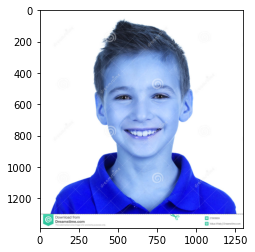

In [57]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [58]:
predictions=DeepFace.analyze(img)

Action: race: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [00:05<00:00,  1.49s/it]


In [59]:
predictions

{'emotion': {'angry': 1.1974396828264106e-16,
  'disgust': 8.428426569652856e-22,
  'fear': 2.104245569683436e-14,
  'happy': 100.0,
  'sad': 1.0390186822218815e-13,
  'surprise': 4.5316966774242473e-14,
  'neutral': 1.3766542572568596e-06},
 'dominant_emotion': 'happy',
 'region': {'x': 327, 'y': 300, 'w': 650, 'h': 650},
 'age': 24,
 'gender': 'Man',
 'race': {'asian': 0.14348382828757167,
  'indian': 0.1805035164579749,
  'black': 0.0153116779983975,
  'white': 75.8043110370636,
  'middle eastern': 9.693510085344315,
  'latino hispanic': 14.162880182266235},
 'dominant_race': 'white'}

In [60]:
type(predictions)

dict

In [61]:
predictions['dominant_emotion']

'happy'

In [62]:
faceCascade=cv2.CascadeClassifier( cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

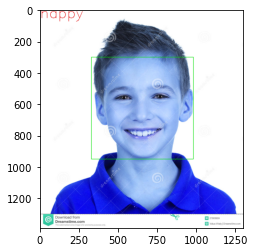

In [63]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces= faceCascade.detectMultiScale(gray,1.1,4)

for (x,y,w,h) in faces:
  cv2.rectangle(img,(x,y),(x+w,y+h),(0,225,0),2)

#plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img,predictions['dominant_emotion'],
                 (0,50),
                  font,3,
                  (0,0,225),
                   2,cv2.LINE_4);

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [65]:
!pip install python-vlc
# importing vlc module
import vlc
  
# importing pafy module
import pafy
  
# url of the video
happy="https://www.youtube.com/watch?v=CiyAA_xraSo"
anger = "https://www.youtube.com/watch?v=g-MQTX0FnB0"
fear="https://www.youtube.com/watch?v=lTEzfj8IAR0"
sad="https://www.youtube.com/watch?v=_iktURk0X-A"
surprise= "https://www.youtube.com/watch?v=_Z42welQWng" 


if predictions['dominant_emotion']=='happy':
    url=happy
elif predictions['dominant_emotion']=='sad':
    url=sad
elif predictions['dominant_emotion']=='angry':
    url=anger
elif predictions['dominant_emotion']=='fear':
    url=fear
elif predictions['dominant_emotion']=='surprise':
    url=surprise
    # creating pafy object of the video
video = pafy.new(url)
# getting stream at index 0
best = video.streams[0]

# creating vlc media player object
media = vlc.MediaPlayer(best.url)

# start playing video
media.play()

0